In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

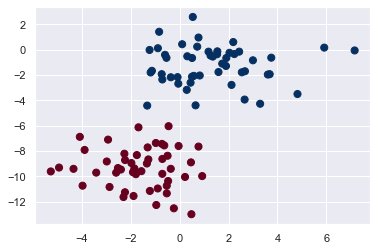

In [8]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [14]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [15]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [26]:
print(train.data[7])

From: bprofane@netcom.com (Gert Niewahr)
Subject: Re: Rumours about 3DO ???
Article-I.D.: netcom.bprofaneC51wHz.HIo
Organization: Netcom Online Communications Services (408-241-9760 login: guest)
Lines: 39

In article <C51Eyz.4Ix@optimla.aimla.com> lex@optimla.aimla.com (Lex van Sonderen) writes:
>In article <h1p4s4g@zola.esd.sgi.com> erik@westworld.esd.sgi.com (Erik Fortune) writes:
>>> better than CDI
>>*Much* better than CDI.
>Of course, I do not agree.  It does have more horsepower.  Horsepower is not
>the only measurement for 'better'.  It does not have full motion, full screen
>video yet.  Does it have CD-ROM XA?
>
>>> starting in the 4 quarter of 1993
>>The first 3DO "multiplayer" will be manufactured by panasonic and will be 
>>available late this year.   A number of other manufacturers are reported to 
>>have 3DO compatible boxes in the works.
>Which other manufacturers?
>We shall see about the date.

A 3DO marketing rep. recently offered a Phillips marketing rep. a $100
bet t

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [18]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

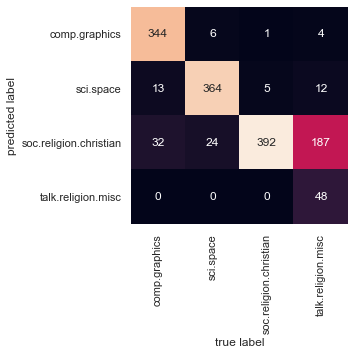

In [19]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [20]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [21]:
predict_category('sending a payload to the ISS')

'sci.space'

In [22]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [27]:
predict_category('determining the screen resolution')

'comp.graphics'

In [29]:
predict_category('it does not have full motion')

'comp.graphics'